<span style='font-size:large'>**1.Presentación**</span>


<span style='font-size:medium'>**1.1.Persona que realiza el trabajo**</span>

<span style='font-size:medium'>Sergio Souto Mourelle</span>



<span style='font-size:medium'>**1.2.Código para definir la función, gráfica e intervalo**</span>


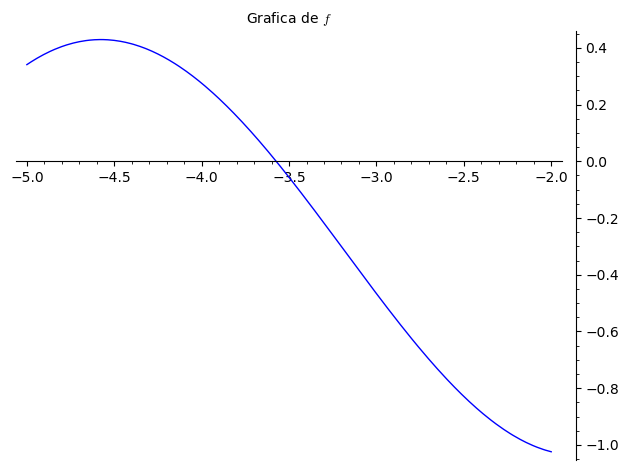

In [11]:
f(x) = sin(x)+(e^x)+(x/8)
a = -5
b = -2
plot(f, a, b,  title='Grafica de $f$')

<span style='font-size:large'>**2.Dicotomía**</span>


<span style='font-size:medium'>**2.1.Cálculo da raíz por dicotomía**</span>


In [12]:
dicotomia(f, a, b)[0:2]

(-3.57353478179652, 42)

<span style='font-size:medium'>**2.2.Gráfica dos iterantes e intervalos encaixados**</span>


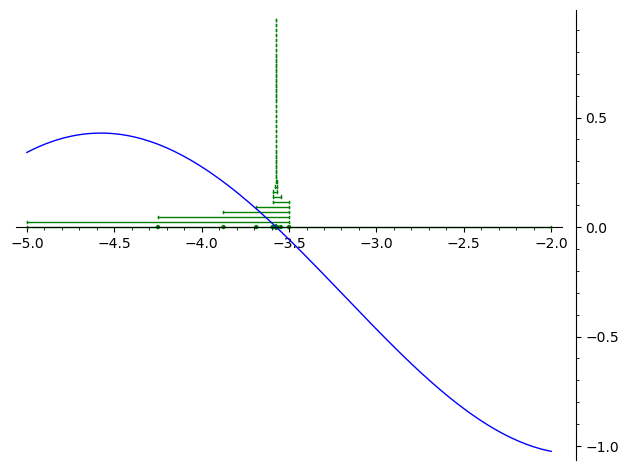

In [13]:
 _,_,x,y = dicotomia(f, a, b)
debuxa_dicotomia(f, a, b, x, y)

<span style='font-size:medium'>**2.3.Número máximo de iterantes**</span>


In [14]:
it_max = lambda a, b: ceil(log((b-a)/1e-12, 2))
it_max(a, b)

42

<span style='font-size:medium'>**2.4.Xustificación de se o número de iteracións é coherente ou non**</span>

O número de iteracións e coherente xa que é igual ao número maximo permitido, o cal é 42.


<span style='font-size:large'>**3.Newton**</span>


<span style='font-size:medium'>**3.1.Cálculo de raíz por metodo de Newton**</span>


In [15]:
newton(f, diff(f), -4.35)[0:2]

(-3.57353478179604, 7)

<span style='font-size:medium'>**3.2.Gráfica dos iterantes e tanxentes do método de Newton**</span>


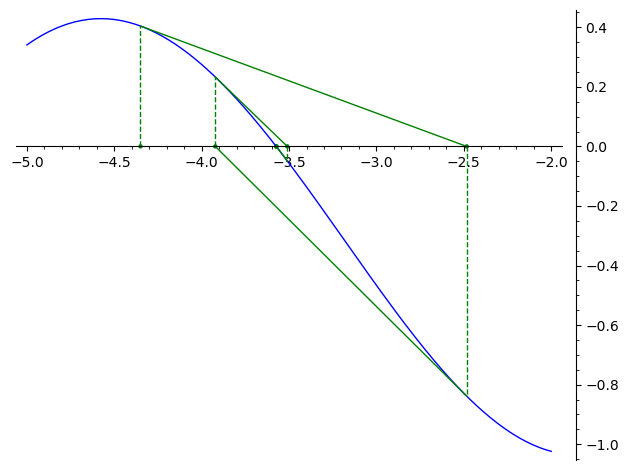

In [16]:
_,_,x = newton(f, diff(f), -4.35)
debuxa_newton(f, a, b, x)

<span style='font-size:medium'>**3.3.Gráfica das constantes de converxencia**</span>


/ext/sage/10.2/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/scikits/__init__.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__("pkg_resources").declare_namespace(__name__)


/ext/sage/10.2/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/scikits/__init__.py:1: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('scikits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  __import__("pkg_resources").declare_namespace(__name__)


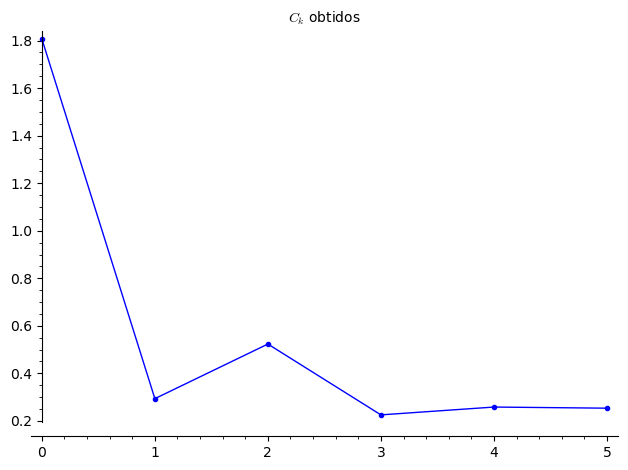

In [17]:
coef_newton(f, a, b, x)

<span style='font-size:medium'>**3.4.Xustificación da converxencia**</span>

<span style='font-size:medium'>Existe converxencia cuadrática xa que podemos ver como a gráfica estabilizase arredor de 0.3</span>


In [3]:
def dicotomia(f, a, b, xtol=1e-12, rtol=1e-14):
    """DICOTOMIA    Calculo de raices por dicotomia."""
    r = a
    k = 0
    v = []
    I = []
    # comprobacions previas
    if abs(f(a)).n() < rtol:
        r = a.n(); return r,k,v,I
    elif abs(f(b)).n() < rtol:
        r = b.n(); return r,k,v,I
    elif (f(a)*f(b)).n() > 0:
        raise RuntimeError('Extremos de igual signo.')
    # calculo iterativo
    while abs(b - a) > xtol:
        r = (a + b).n() / 2
        k = k + 1
        v.append(r)
        I.append((a,b))
        if abs(f(r)).n() < rtol:
            return r,k,v,I
        elif (f(a)*f(r)).n() < 0:
            b = r
        else:
            a = r
    return r,k,v,I

def debuxa_dicotomia(f, a, b, v, I):
    """DEBUXA_DICOTOMIA    Visualiza intervalos de dicotomía."""
    p = plot(f, a, b) + point(zip(v,[0]*len(v)), color='green')
    h = (p.ymax() - p.ymin())/(1.5*len(v))
    show(sum(line([(a,h*i),    (b,h*i)],     color='green') + \
             line([(a,h*i-h/4),(a,h*i+h/4)], color='green') + \
             line([(b,h*i-h/4),(b,h*i+h/4)], color='green')   \
             for i, (a,b) in enumerate(I)) + p, xmin=a, xmax=b)
    
def newton(f, df, x0, xtol=1e-12, rtol=1e-14, M=100, errorM=True):
    """NEWTON    Calculo de raices por Newton."""
    v = [x0.n()]
    for k in range(M):
        dfx = df(v[k]).n()
        if abs(dfx) < rtol:
            raise RuntimeError('Derivada nula.')
        r = (v[k] - f(v[k]) / dfx).n()
        v.append(r)
        # test de parada
        if abs(r-v[k]) < xtol or abs(f(r)).n() < rtol:
            return r, len(v), v
    if errorM: raise RuntimeError('Excedido numero maximo de iteracions.')
    return r, len(v), v

def debuxa_newton(f, a, b, v):
    """DEBUXA_NEWTON    Visualiza tanxentes do metodo de Newton."""
    show(plot(f, a, b) + point(zip(v,[0]*len(v)), color='green') + \
    sum(line([(v[i],0),(v[i],f(v[i]))], color='green', linestyle='--') for i in range(len(v))) + \
    sum(line([(v[i-1],f(v[i-1])), (v[i],0)], color='green') for i in range(1,len(v))), xmin=a, xmax=b)
    
def coef_newton(f, a, b, v):
    """COEF_NEWTON    Calcula os coeficientes de converxencia de Newton."""
    alpha = find_root(f, a, b, xtol=9.e-16, rtol=9.e-16) #aproximamos "ao máximo" a raíz
    pts = []
    for k in range(len(v)-1):
        if (alpha - v[k])^2 > RDF.epsilon():
            pts.append( (k, abs(alpha - v[k+1]) / (alpha - v[k])^2 ) )
    return line(pts, marker = '.', title='$C_k$ obtidos')